In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# załaduj dane
train = pd.read_csv("./data/fashion-mnist_train.csv")
test = pd.read_csv("./data/fashion-mnist_test.csv")
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [3]:
# podziel na wartości i etykiety
x_train, y_train = train.loc[:, train.columns != 'label']/255, train['label']
x_test, y_test = test.loc[:, test.columns != 'label']/255, test['label']

0


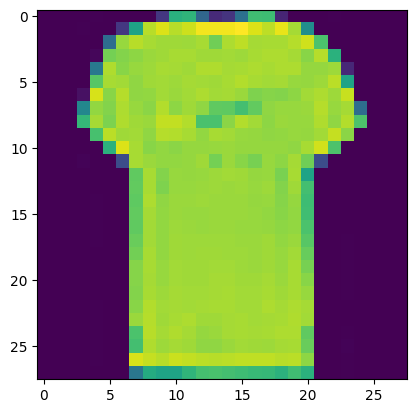

In [ ]:
# wizualizacja danych
n=10
print(y_train[n])
plt.imshow(x_train.loc[n].values.reshape(28,28))

In [4]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [ ]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Input((784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model1.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

model1.fit(x_train, y_train, validation_split=0.5, epochs=10, verbose=0)
model1.evaluate(x_test,  y_test, verbose=2) 

313/313 - 0s - 583us/step - accuracy: 0.8787 - loss: 0.3442


[0.3442145586013794, 0.8787000179290771]

In [ ]:
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Input((784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model4.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

model4.fit(x_train, y_train, validation_split=0.5, epochs=10, verbose=0)
model4.evaluate(x_test,  y_test, verbose=2) 

313/313 - 0s - 687us/step - accuracy: 0.8786 - loss: 0.3585


[0.3585478663444519, 0.878600001335144]

In [ ]:
model8 = tf.keras.models.Sequential([
  tf.keras.layers.Input((784,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model8.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

model8.fit(x_train, y_train, validation_split=0.5, epochs=10, verbose=0)
model8.evaluate(x_test,  y_test, verbose=2) 

313/313 - 0s - 758us/step - accuracy: 0.8678 - loss: 0.3729


[0.3729410767555237, 0.8677999973297119]

In [ ]:
model1_wide = tf.keras.models.Sequential([
  tf.keras.layers.Input((784,)),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model1_wide.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

history = model1_wide.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=1000, verbose=1, callbacks=[early_stopping])
model1_wide.evaluate(x_test,  y_test, verbose=2) 

Epoch 1/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7614 - loss: 0.7754 - val_accuracy: 0.8486 - val_loss: 0.4282
Epoch 2/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8408 - loss: 0.4395 - val_accuracy: 0.8363 - val_loss: 0.4764
Epoch 3/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8513 - loss: 0.4148 - val_accuracy: 0.8602 - val_loss: 0.4339
Epoch 4/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8586 - loss: 0.3944 - val_accuracy: 0.8480 - val_loss: 0.4498
Epoch 5/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8559 - loss: 0.3974 - val_accuracy: 0.8514 - val_loss: 0.4522
Epoch 6/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8623 - loss: 0.3805 - val_accuracy: 0.8568 - val_loss: 0.4192
Epoch 7/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8649 - loss: 0.3719 - val_accuracy: 0.8571 - val_loss: 0.4301
Epoch 8/1000
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8664 -

[0.4081980586051941, 0.8632000088691711]

In [ ]:
model1_wide.compile(
    optimizer=optimizer,
    loss=loss_fn,
    metrics=['accuracy']
)

history = model1_wide.fit(x_train, y_train, batch_size=32, validation_split=0.5, epochs=1000, verbose=1, callbacks=[early_stopping])
model1_wide.evaluate(x_test,  y_test, verbose=2) 

Epoch 1/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8943 - loss: 0.2794 - val_accuracy: 0.8681 - val_loss: 0.3882
Epoch 2/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9120 - loss: 0.2371 - val_accuracy: 0.8745 - val_loss: 0.3632
Epoch 3/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9111 - loss: 0.2326 - val_accuracy: 0.8725 - val_loss: 0.3777
Epoch 4/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9160 - loss: 0.2188 - val_accuracy: 0.8888 - val_loss: 0.3364
Epoch 5/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9236 - loss: 0.2036 - val_accuracy: 0.8837 - val_loss: 0.3603
Epoch 6/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9219 - loss: 0.2090 - val_accuracy: 0.8813 - val_loss: 0.3628
Epoch 7/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9282 - loss: 0.1903 - val_accuracy: 0.8794 - val_loss: 0.3817
Epoch 8/1000
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9302 - loss: 0.1825 - 

[0.3705008924007416, 0.8705000281333923]

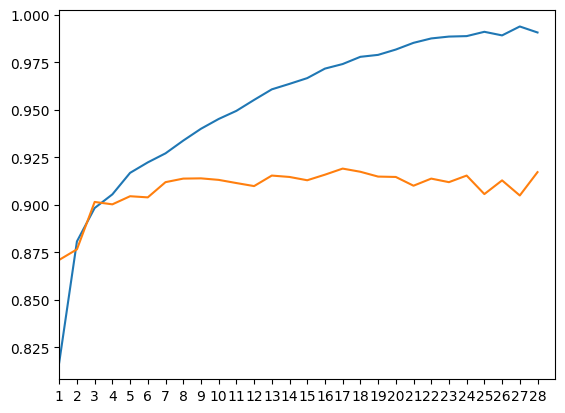

In [13]:
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

passed = len(loss)
t = np.arange(0, passed, 1)

fig, ax = plt.subplots()
ax.plot(t, loss)
ax.plot(t, val_loss)
ax.set(xlim=(0,passed), xticks=t, xticklabels=t+1)


plt.show()

In [5]:
x_train_cnn = x_train.values.reshape((60000, 28,28))
x_test_cnn = x_test.values.reshape((10000, 28,28))

In [6]:
x_train_cnn[0].shape

(28, 28)

In [9]:
# We are using sequential model which is linear stack of layers. The Sequential model is initialized first and then using add method we add rest of the layers

model = tf.keras.Sequential()

model.add(tf.keras.layers.Input((28,28,1)))

# First layer, which has a 2D Convolutional layer with kernel size as 3x3 and Max pooling operation 
model.add(tf.keras.layers.Conv2D(32, (3,3), padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Second layer, which has a 2D Convolutional layer with kernel size as 3x3 & ReLU activation and Max pooling operation 
model.add(tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Fully connected layer with ReLU activation function 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# Output layer with softmax activation function
model.add(tf.keras.layers.Dense(10))

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='Adam', metrics=['accuracy'], loss=loss_fn)

history = model.fit(x_train_cnn, y_train, batch_size=128, epochs=100, validation_split=0.25, callbacks=[early_stopping])
model.evaluate(x_test_cnn, y_test)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7373 - loss: 0.7392 - val_accuracy: 0.8710 - val_loss: 0.3723
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8767 - loss: 0.3427 - val_accuracy: 0.8765 - val_loss: 0.3367
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8978 - loss: 0.2820 - val_accuracy: 0.9015 - val_loss: 0.2814
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9051 - loss: 0.2599 - val_accuracy: 0.9002 - val_loss: 0.2854
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9155 - loss: 0.2345 - val_accuracy: 0.9045 - val_loss: 0.2680
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9241 - loss: 0.2085 - val_accuracy: 0.9039 - val_loss: 0.2688
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9279 - loss: 0.1979 - val_accuracy: 0.9119 - val_loss: 0.2515
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9359 - loss: 0.1772 - 

[0.22834108769893646, 0.917900025844574]

## Czytanki
* https://medium.com/@learnwithwhiteboard_digest/8-tips-on-how-to-choose-neural-network-architecture-e50590e99ab1
* https://arxiv.org/pdf/1206.5533
* https://machinelearningmastery.com/using-dropout-regularization-in-pytorch-models/